In [25]:
import tensorflow as tf
import pandas as pd 
import numpy as np
import autokeras as ak
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv("spam.csv", encoding="latin-1")

In [6]:
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [10]:
df = df.rename(columns={"v1": "target", "v2": "text"})

In [12]:
X = df["text"]
y = df["target"]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4242)

In [16]:
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

In [19]:
auto_ml = ak.TextClassifier(max_trials=2, overwrite=True)
auto_ml.fit(X_train, y_train, callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])

Trial 2 Complete [00h 00m 05s]
val_loss: 0.05450098589062691

Best val_loss So Far: 0.03696010634303093
Total elapsed time: 00h 00m 26s
INFO:tensorflow:Oracle triggered exit
Epoch 1/3
122/122 [==============================] - 5s 38ms/step - loss: 0.3333 - accuracy: 0.8764
Epoch 2/3
122/122 [==============================] - 5s 38ms/step - loss: 0.0673 - accuracy: 0.9821
Epoch 3/3
122/122 [==============================] - 5s 39ms/step - loss: 0.0224 - accuracy: 0.9938


INFO:tensorflow:Assets written to: ./text_classifier/best_model/assets


INFO:tensorflow:Assets written to: ./text_classifier/best_model/assets


In [20]:
auto_ml.evaluate(X_test, y_test)

53/53 [==============================] - 1s 10ms/step - loss: 0.0806 - accuracy: 0.9797


[0.08057235926389694, 0.9796651005744934]

In [21]:
y_pred = auto_ml.predict(X_test)

53/53 [==============================] - 1s 10ms/step


In [23]:
accuracy_score(y_test, y_pred)

0.9796650717703349

In [24]:
model = auto_ml.export_model()

In [26]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None,)]                 0         
                                                                 
 expand_last_dim (ExpandLast  (None, 1)                0         
 Dim)                                                            
                                                                 
 text_vectorization (TextVec  (None, 512)              0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 512, 64)           320064    
                                                                 
 dropout (Dropout)           (None, 512, 64)           0         
                                                                 
 conv1d (Conv1D)             (None, 508, 256)          82176 

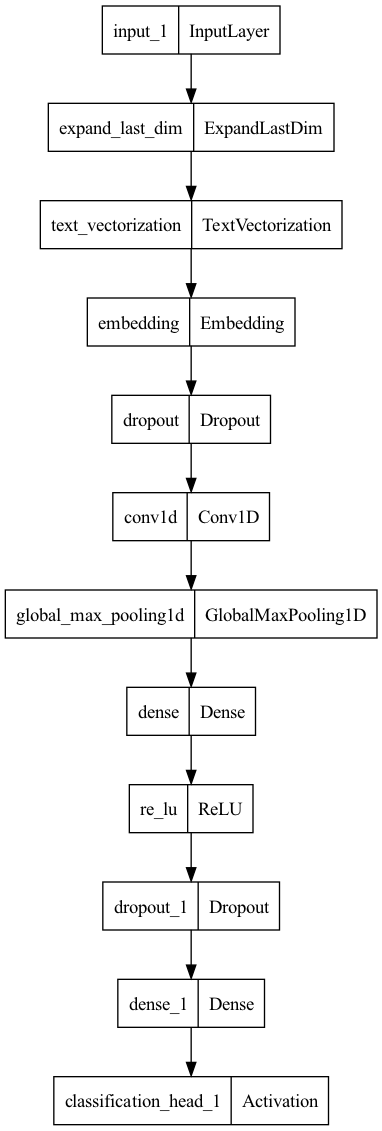

In [27]:
plot_model(model)